# Notebook 01 
This notebook handles:
- Loading raw data
- Cleaning, encoding, and preprocessing
- Exploratory analysis

# 1. Imports

In [ ]:
import numpy as np
import pandas as pd
from longevity_prediction.utils.preprocessing_helpers import get_missingness_report
from longevity_prediction.utils.notebook_setup import setup_notebook, resolve_project_path
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Settings / Configuration

In [2]:
setup_notebook(seed=42)

# 3. Loading data

In [3]:
df_raw = pd.read_csv(resolve_project_path("data", "raw", "life_expectancy_data.csv"))

In [4]:
df_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 4. Initial Data Overview

In [5]:
df_raw.shape

(2938, 22)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df_raw.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# 5. Data Standardization

## 5.1. Variables Overview

The dataset contains 22 variables covering demographic, economic, and health-related indicators.
A full data dictionary is provided in `docs/data_dictionary.md`.

## 5.2. Column name standardization

In [8]:
df_raw.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df_std = df_raw.copy()

In [10]:
df_std.columns = (
    df_std.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_", regex=False)
    .str.replace("-", "_", regex=False)
    .str.replace("/", "_", regex=False)
    .str.replace(r"__+", "_", regex=True)
)

In [11]:
#handling a typo
df_std = df_std.rename(columns={"thinness_1_19_years": "thinness_10_19_years"})

In [12]:
#renaming for semantic clarity
df_std = df_std.rename(columns={
    "polio": "polio_vaccination",
    "diphtheria": "diphtheria_vaccination",
    "hepatitis_b": "hepatitis_b_vaccination"
})

In [13]:
df_std.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b_vaccination', 'measles', 'bmi', 'under_five_deaths',
       'polio_vaccination', 'total_expenditure', 'diphtheria_vaccination',
       'hiv_aids', 'gdp', 'population', 'thinness_10_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

# 5.3. Data type casting

In [14]:
df_std["country"] = df_std["country"].astype("category")
df_std["status"] = df_std["status"].astype("category")

# 6. Data Cleaning
- Normalize categorical string values
- Handle data types
- Confirm missing data status

In [15]:
df_clean = df_std.copy()

## 6.1 Logical Validation & Error Handling

Data integrity is enforced by identifying and nullifying observations that violate biological or logical constraints. This step ensures that subsequent imputation and modeling are not biased by erroneous data entry or reporting anomalies.

### 6.1.1 Data integrity audit

In [16]:
zero_counts = (df_clean == 0).sum()
print("Zero value counts per column:\n", zero_counts[zero_counts > 0])

Zero value counts per column:
 infant_deaths                      848
percentage_expenditure             611
measles                            983
under_five_deaths                  785
income_composition_of_resources    130
schooling                           28
dtype: int64


In [17]:
df_clean.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b_vaccination,measles,bmi,under_five_deaths,polio_vaccination,total_expenditure,diphtheria_vaccination,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [18]:
display(df_clean.sort_values('population').head(10)[['country', 'year', 'population']])

,country,year,population
1614,Maldives,2003,34.0
1608,Maldives,2009,36.0
1603,Maldives,2014,41.0
985,Georgia,2008,43.0
1159,Hungary,2010,123.0
2640,Tonga,2008,135.0
2644,Tonga,2004,146.0
1617,Maldives,2000,286.0
1958,Palau,2013,292.0
1616,Maldives,2001,292.0


In [19]:
display(df_clean.sort_values('bmi').head(10)[['country', 'year', 'bmi']])

,country,year,bmi
2887,Viet Nam,2002,1.0
2886,Viet Nam,2003,1.4
207,Bangladesh,2000,1.4
206,Bangladesh,2001,1.8
2885,Viet Nam,2004,1.9
1555,Madagascar,2014,2.0
2153,Rwanda,2013,2.1
600,Comoros,2007,2.1
1024,Ghana,2001,2.1
724,Democratic Republic of the Congo,2012,2.1


In [20]:
display(df_clean.dropna(subset=['bmi']).sort_values('bmi').tail(10)[['country', 'year', 'bmi']])

,country,year,bmi
1381,Kiribati,2012,76.2
1380,Kiribati,2013,76.7
1379,Kiribati,2014,77.1
1909,Niue,2013,77.3
1378,Kiribati,2015,77.6
2713,Tuvalu,2013,79.3
1650,Marshall Islands,2013,81.6
624,Cook Islands,2013,82.8
1958,Palau,2013,83.3
1812,Nauru,2013,87.3


### 6.1.2 Boundary Violations

Hard limit application

In [21]:
df_clean[df_clean['adult_mortality'] < 5][['country', 'year', 'adult_mortality']]

,country,year,adult_mortality
13,Afghanistan,2002,3.0
23,Albania,2008,1.0
209,Barbados,2014,1.0
254,Belgium,2001,1.0
329,Bosnia and Herzegovina,2006,1.0
339,Botswana,2012,3.0
376,Brunei Darussalam,2007,1.0
490,Cameroon,2005,4.0
542,Chad,2001,4.0
556,Chile,2003,1.0


Adult mortality values below 5 are treated as data entry errors, as they fall outside the biologically plausible range for the recorded countries. These observations are nullified (set to NaN) to prevent bias during the imputation phase.

In [22]:
df_clean.loc[df_clean['adult_mortality'] < 5, 'adult_mortality'] = np.nan

In [23]:
df_clean[df_clean['adult_mortality'] > 700][['country', 'year', 'adult_mortality']]

,country,year,adult_mortality
2932,Zimbabwe,2005,717.0
2933,Zimbabwe,2004,723.0
2934,Zimbabwe,2003,715.0


In [24]:
immunization_rates = ['hepatitis_b_vaccination', 'diphtheria_vaccination', 'polio_vaccination']

In [25]:
for col in immunization_rates:
    df_clean.loc[df_clean[col] > 100, col] = 100

### 6.1.3 Placeholder zeros

In [26]:
placeholder_zero_cols = ['schooling', 'income_composition_of_resources', 'percentage_expenditure']
for col in placeholder_zero_cols:
    df_clean.loc[df_clean[col] == 0, col] = np.nan

6.1.4 Cross-Variable Consistency

In [27]:
df_clean.loc[df_clean['infant_deaths'] > df_clean['under_five_deaths'], 'infant_deaths']

Series([], Name: infant_deaths, dtype: int64)

In [28]:
# Audit shows 0 current violations; logic is included for pipeline robustness.
mask_death = df_clean['infant_deaths'] > df_clean['under_five_deaths']
df_clean.loc[mask_death, 'infant_deaths'] = np.nan

In [29]:
# Identify rows where age-group subsets diverge significantly (>10%).
thin_mask = abs(df_clean['thinness_10_19_years'] - df_clean['thinness_5_9_years']) > 10
df_clean.loc[thin_mask, ['thinness_10_19_years', 'thinness_5_9_years']] = np.nan

In [30]:
# Flagging inconsistencies where percentage_expenditure suggests high spending despite near-zero recorded GDP.
econ_mask = (df_clean['percentage_expenditure'] > 100) & (df_clean['gdp'] < 10)
df_clean.loc[econ_mask, ['percentage_expenditure', 'gdp']] = np.nan

### 6.1.5 Dimensionality Reduction & Noise Removal

In [31]:
print(f"Correlation between Population and Life Expectancy: {df_clean['population'].corr(df_clean['life_expectancy']):.4f}")

Correlation between Population and Life Expectancy: -0.0215


The population feature is excluded from the final dataset. Audit results (Section 6.1.1) revealed critical unit inconsistencies across observations that prevent reliable normalization. Given the feature's historically low correlation with Life Expectancy, removal is preferred over imputation to ensure the model relies on high-integrity predictors like gdp and schooling.

In [32]:
df_clean = df_clean.drop(columns=['population'])

### 6.1.6 Feature Refactoring: BMI to Overweight Prevalence

Audit (Section 6.1.1) revealed values from 1.0 (Viet Nam) to 87.3 (Nauru). This range matches WHO Overweight Prevalence (%) metrics, not BMI units.

In [33]:
df_clean = df_clean.rename(columns={'bmi': 'overweight_prevalence'})

## 6.2 Missing values

### 6.2.1 Missingness report

In [34]:
get_missingness_report(df_clean)

,missing_count,missing_pct
percentage_expenditure,611,20.796460
hepatitis_b_vaccination,553,18.822328
gdp,448,15.248468
income_composition_of_resources,297,10.108918
total_expenditure,226,7.692308
alcohol,194,6.603131
schooling,191,6.501021
thinness_5_9_years,46,1.565691
thinness_10_19_years,46,1.565691
adult_mortality,40,1.361470


### 6.2.2 Economic & Development Features

Intra-Country Interpolation (Time-Series)

In [ ]:
econ_features = [
    'gdp', 
    'percentage_expenditure', 
    'schooling', 
    'income_composition_of_resources',
    'total_expenditure'
]

In [ ]:
df_clean[econ_features] = df_clean.groupby('country')[econ_features].transform(
    lambda x: x.interpolate(method='linear').bfill().ffill()
)

In [ ]:
interpolation_report = get_missingness_report(df_clean[econ_features])
print("Remaining holes in time-series features:")
display(interpolation_report)

Remaining holes in time-series features:


,missing_count,missing_pct
percentage_expenditure,421,14.329476
gdp,405,13.784888
income_composition_of_resources,167,5.684139
schooling,165,5.616065
total_expenditure,32,1.089176


In [38]:
gdp_voids = df_clean.groupby('country')['gdp'].apply(lambda x: x.isnull().all())
void_countries = gdp_voids[gdp_voids == True].index.tolist()

print(f"Number of countries with ZERO GDP data: {len(void_countries)}")
print("Sample of void countries:", void_countries[:10])

Number of countries with ZERO GDP data: 30
Sample of void countries: ['Bahamas', 'Bolivia (Plurinational State of)', 'Congo', 'Cook Islands', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Egypt', 'Gambia']


Identified countries like North Korea and Czechia as 'voids' requiring group-level imputation

In [ ]:
df_clean[econ_features] = df_clean[econ_features].fillna(
    df_clean.groupby(['status', 'year'])[econ_features].transform('median')
)

### 6.2.3 Public Health & Clinical Features

In [40]:
health_features = ['hepatitis_b_vaccination', 'polio_vaccination', 'diphtheria_vaccination', 'alcohol']

In [41]:
for col in health_features:
    df_clean[col] = df_clean.groupby('country')[col].transform(lambda x: x.interpolate().bfill().ffill())

In [42]:
interpolation_report = get_missingness_report(df_clean[health_features])
print("Remaining holes in health features:")
display(interpolation_report)

Remaining holes in health features:


,missing_count,missing_pct
hepatitis_b_vaccination,144,4.901293
alcohol,17,0.578625


In [43]:
for col in health_features:
    df_clean[col] = df_clean[col].fillna(
        df_clean.groupby(['status', 'year'])[col].transform('median')
    )

### 6.2.4 Biological & Mortality Features

In [ ]:
df_clean = df_clean.dropna(subset=['life_expectancy'])

In [ ]:
bio_features = [
    'thinness_10_19_years', 'thinness_5_9_years', 
    'adult_mortality', 'overweight_prevalence'
]

In [51]:
for col in bio_features:
    df_clean[col] = df_clean.groupby('country')[col].transform(lambda x: x.interpolate().bfill().ffill())
    df_clean[col] = df_clean[col].fillna(df_clean.groupby(['status', 'year'])[col].transform('median'))

In [52]:
numeric_cols = df_clean.select_dtypes(include=['number']).columns

df_clean[numeric_cols] = df_clean[numeric_cols].fillna(
    df_clean.groupby('status')[numeric_cols].transform('median')
)

### 6.2.5 Final check

In [53]:
print(get_missingness_report(df_clean))

No missing values detected.


## 6.3 Duplicates

In [55]:
df_clean.duplicated().sum()

np.int64(0)

## 6.4 Outliers

In [56]:
key_indicators = ['gdp', 'adult_mortality', 'alcohol', 'schooling']

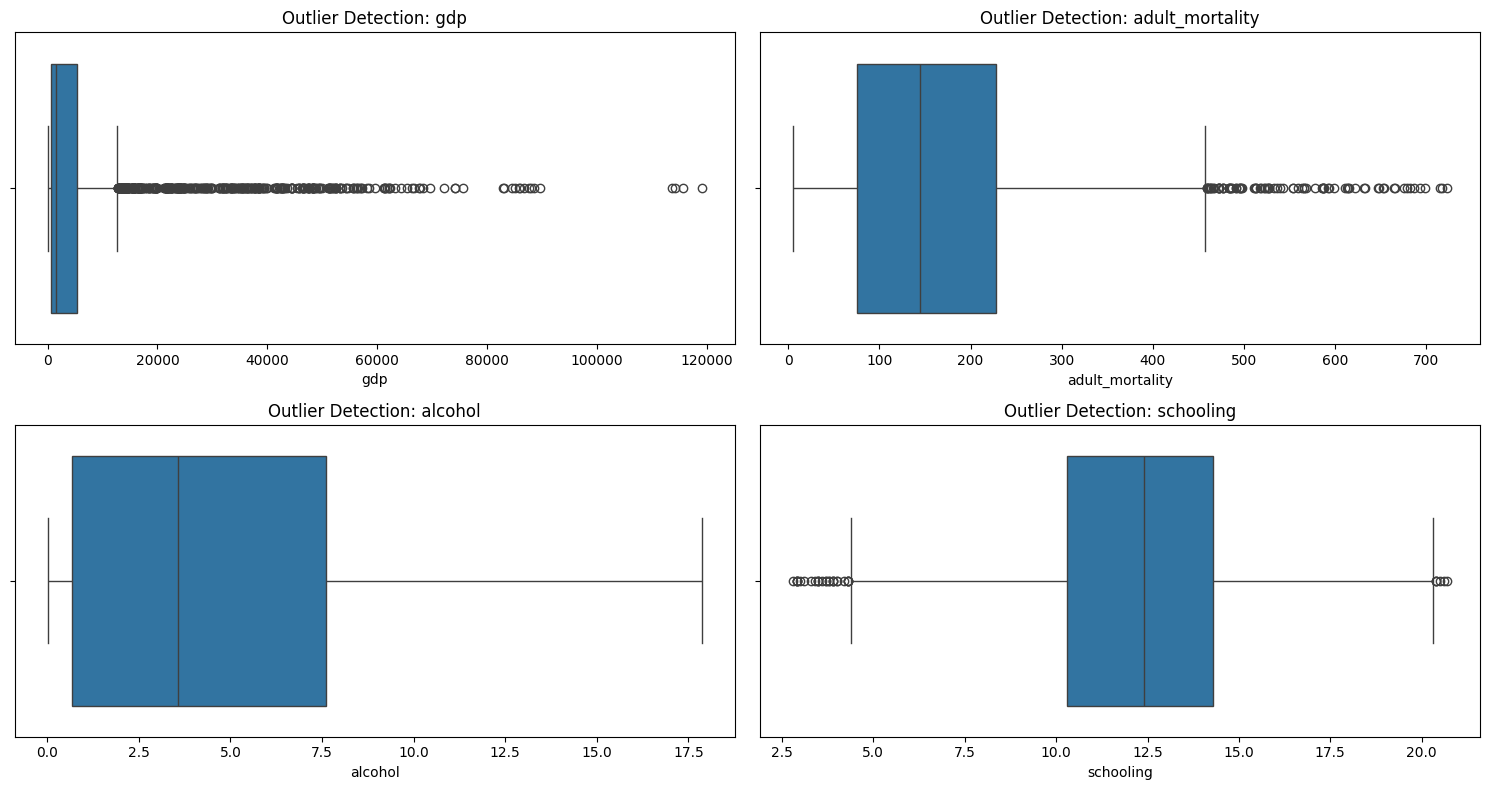

In [58]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(key_indicators, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Outlier Detection: {col}')
plt.tight_layout()
plt.show()

**Note on Outlier Strategy:**
- Features such as GDP, adult_mortality show significant right-skewness (Skew > 3.0)
- These represent natural socio-economic disparities rather than data entry errors.
- Decision: Retain all natural outliers for the baseline model. If the initial model shows high residual errors for these points, revisit Log-Transforming GDP or Winsorizing mortality rates in the Feature Engineering phase.

### 6.5 Post-Baseline Iteration Roadmap

The current cleaning strategy focuses on creating a high-integrity baseline. Depending on initial model performance (Residual Analysis), the following steps will be revisited:
- Advanced Imputation
- Target Distribution
- Feature Scaling & Skewness
- Multicollinearity Audit

# 7. Exploratory Data Analysis (Initial Pass)
- Target variable distribution
- Basic relationships
- Early observations to inform modeling

NOTE: Future Work & Model Refinements
- Feature Engineering
- Advanced Imputation
- Dimensionality
- .